#### 🐶😺 개 / 고양이 분류

##### [ 분석 준비 ]

In [4]:
extract_folder = '../Python_Deeplearning/'

In [5]:
# 훈련 셋, 검증 셋 저장 위치 지정
train_dir = extract_folder + 'archive/training_set/training_set/'
valid_dir = extract_folder + 'archive/test_set/test_set/'

print(train_dir)
print(valid_dir)

../Python_Deeplearning/archive/training_set/training_set/
../Python_Deeplearning/archive/test_set/test_set/


##### [ 모델 학습 ]

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

🔹 ImageDataGenerator

In [7]:
# 이미지 데이터 제너레이터 정의
# 이미지 픽셀값 0.0 ~ 1.0 범위로 정규화
image_gen = ImageDataGenerator(rescale = (1/255.))
image_gen

🔹 flow_from_directory 함수

In [9]:
# flow_from_directory 함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정의
train_gen = image_gen.flow_from_directory(train_dir,
batch_size = 32,
target_size = (224, 224),
classes = ['cats', 'dogs'],
class_mode = 'binary',
seed = 2020)

valid_gen = image_gen.flow_from_directory(valid_dir,
batch_size = 32,
target_size = (224, 224),
classes = ['cats', 'dogs'],
class_mode = 'binary',
seed = 2020)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


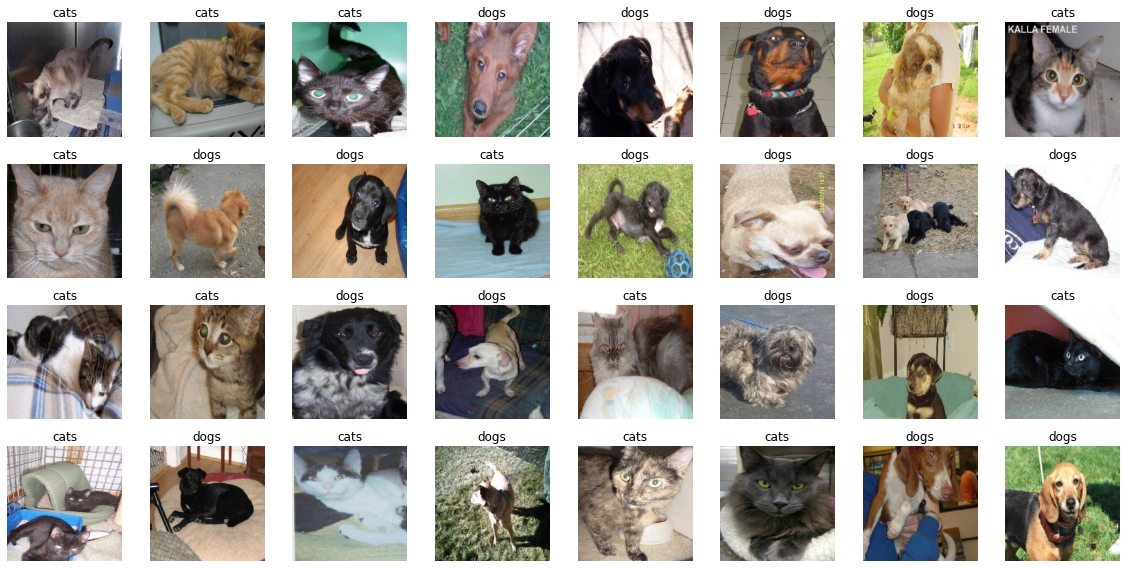

In [12]:
# 1개의 배치를 선택 => 32개의 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)     # 제일 첫번 째 배치 들고오기
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))
for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis('off')
plt.tight_layout()
plt.show()

🔹 모델 훈련

In [22]:
def build_model():
    model = tf.keras.Sequential([
        # Convolution layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Classifier layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    return model

In [23]:
model = build_model()

In [27]:
# 모델 컴파일
model.compile(optimizer = tf.optimizers.Adam(lr=0.001),
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics = ['acc'])

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 2)

In [29]:
# 모델 훈련
history = model.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks=[callback])

Epoch 1/20


c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


251/251 [==============================] - 755s 3s/step - loss: 1.7192 - acc: 0.5294 - val_loss: 0.6875 - val_acc: 0.5007
Epoch 2/20
251/251 [==============================] - 768s 3s/step - loss: 0.6806 - acc: 0.5784 - val_loss: 0.6615 - val_acc: 0.6085
Epoch 3/20
251/251 [==============================] - 815s 3s/step - loss: 0.6644 - acc: 0.6057 - val_loss: 0.6601 - val_acc: 0.6199
Epoch 4/20
251/251 [==============================] - 579s 2s/step - loss: 0.6612 - acc: 0.6057 - val_loss: 0.6276 - val_acc: 0.6723
Epoch 5/20
251/251 [==============================] - 1712s 7s/step - loss: 0.6602 - acc: 0.6051 - val_loss: 0.6717 - val_acc: 0.6273
Epoch 6/20
251/251 [==============================] - 544s 2s/step - loss: 0.6601 - acc: 0.6067 - val_loss: 0.6161 - val_acc: 0.6940
Epoch 7/20
251/251 [==============================] - 564s 2s/step - loss: 0.6367 - acc: 0.6478 - val_loss: 0.6516 - val_acc: 0.6159
Epoch 8/20
251/251 [==============================] - 558s 2s/step - loss: 0.63